# Pratica 5 - Modelos de Linguagem
Modelos de Linguagem envolvem a estimação de probabilidades condicionais de ocorrência de um termo dado um contexto. 
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_1t_2)P(t_4|t_1t_2t_3)$$

In [1]:
import nltk
import string
from nltk.corpus import machado
from nltk.corpus import stopwords
%pylab inline

ModuleNotFoundError: No module named 'nltk'

### Modelo Unigrama  (bag of words)
 neste modelo, a ordem das palavras não importa. 
 $$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2)P(t_3)P(t_4)$$

In [2]:
swu = stopwords.words('portuguese') + list (string.punctuation)
wordgen = (word for word in machado.words() if word.lower() not in swu)
fd = nltk.FreqDist(wordgen)
fd.most_common(20)

[('\x97', 25386),
 ('--', 9643),
 ('...', 8180),
 ('disse', 6444),
 ('ser', 4831),
 ('casa', 4821),
 ('tempo', 4339),
 ('ainda', 4226),
 ('coisa', 3999),
 ('dia', 3959),
 ('olhos', 3936),
 ('tudo', 3879),
 ('lo', 3726),
 ('outro', 3652),
 ('nada', 3648),
 ('tão', 3592),
 ('outra', 3553),
 ('D', 3495),
 ('dois', 3494),
 ('homem', 3249)]

In [32]:
x,y = zip(*fd.most_common(20))

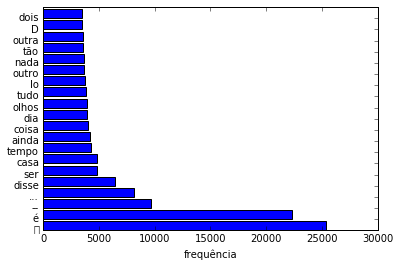

In [30]:
barh(bottom=range(len(x)), width=y);
ax = gca()
ax.set(yticks=range(len(x)),yticklabels=x);
xlabel('frequência');

### Bigramas
Uma alternativa ao modelo bag-of-words onde as probabilidades são independentes, é o modelo bigrama. onde calculamos a probabilidade de ocorrência de uma palavra condicionada à ocorrência da anterior.
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_2)P(t_4|t_3)$$
nltk.ConditionalFreqDist é um estimador de probabilidades condicionais. Dada uma lista de bigramas, para cada palavra no vocabulário, ele calculará uma distribuição de frequências para a próxima palavra.

In [8]:
wordgen = (word.lower() for word in machado.words() )#if word.lower() not in swu)
machado_2gram = nltk.ConditionalFreqDist(nltk.bigrams(wordgen))

*conditions()* retorna as palavras para as quais temos distribuições condicionais construídas.

In [9]:
machado_2gram.conditions()

['conto',
 ',',
 'contos',
 'fluminenses',
 '1870',
 'texto',
 '-',
 'fonte',
 ':',
 'obra',
 'completa',
 'machado',
 'de',
 'assis',
 'vol',
 '.',
 'ii',
 'rio',
 'janeiro',
 'nova',
 'aguilar',
 '1994',
 'publicado',
 'originalmente',
 'pela',
 'editora',
 'garnier',
 'em',
 'índice',
 'miss',
 'dollar',
 'luís',
 'soares',
 'a',
 'mulher',
 'preto',
 'o',
 'segredo',
 'augusta',
 'confissões',
 'uma',
 'viúva',
 'moça',
 'linha',
 'reta',
 'e',
 'curva',
 'frei',
 'simão',
 'capítulo',
 'primeiro',
 'iii',
 'iv',
 'v',
 'vi',
 'vii',
 'viii',
 'era',
 'conveniente',
 'ao',
 'romance',
 'que',
 'leitor',
 'ficasse',
 'muito',
 'tempo',
 'sem',
 'saber',
 'quem',
 'mas',
 'por',
 'outro',
 'lado',
 'apresentação',
 'seria',
 'autor',
 'obrigado',
 'longas',
 'digressões',
 'encheriam',
 'papel',
 'adiantar',
 'ação',
 'não',
 'há',
 'hesitação',
 'possível',
 'vou',
 'apresentar',
 'lhes',
 'se',
 'é',
 'rapaz',
 'dado',
 'gênio',
 'melancólico',
 'imagina',
 'inglesa',
 'pálida',
 '

Podemos obter a contagem de palavras que se seguem à uma palavra específica.

In [14]:
machado_2gram['exercia']

FreqDist({'um': 4, 'o': 4, 'sobre': 4, 'a': 3, 'nela': 3, 'desde': 2, 'em': 2, 'aquele': 1, 'outra': 1, '-': 1, ...})

Ou podemos obter a Probabilidade por máxima verossimilhança:

In [16]:
machado_2gram_cp = nltk.ConditionalProbDist(machado_2gram, nltk.MLEProbDist)

In [17]:
cp = machado_2gram_cp['exercia']
cp.samples()

dict_keys(['a', 'aquele', 'um', 'outra', 'o', '-', 'de', 'desde', 'nela', 'na', 'uma', 'as', 'sobre', 'esse', 'no', 'nele', 'em', 'mais', 'então', 'interinamente', 'com', 'realmente'])

In [51]:
cp.prob('sobre')

0.1111111111111111

In [19]:
cp.prob('nela')

0.08108108108108109

In [30]:
machado_2gram_cp['exercia'].generate()

'o'

In [31]:
def gera_texto(palavra_inicial, cpd,numero=50):
    
    w = palavra_inicial
    texto = w
    for i in range(numero):
        w2 = cpd[w].generate()
        sep = ' ' if w2 not in string.punctuation else ''
        texto += sep + w2
        w = w2
    return texto

In [34]:
gera_texto('cresceu',machado_2gram_cp, numero=100)

'cresceu, sem aquelas atenções da dor. tinha como prima. tal é na frança, entrei para itaboraí; mas leitura; eu pudesse provar que fechara- se tiveres a primeira noite no fim é a dois minutos para as sobrancelhas; isto prova disto, ou quanto à discussão, para o mesmo que lhe a lembrança uns dias, amáveis conterrâneos. pois! dizia que fizeram artista se consolasse dando- la a família, imaginações, sem grandes paixões e não podem sofrer .\x94 em pessoas, se à morte. a impressão do'

## Modelo de Trigramas

In [36]:
wordgen = (word.lower() for word in machado.words() )#if word.lower() not in swu)
machado_2gram = nltk.ConditionalFreqDist(nltk.trigrams(wordgen))

ValueError: too many values to unpack (expected 2)